In [3]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [5]:
x = []
y = []
for dir in os.listdir('./datasets/flowers/'):
    for file in os.listdir('./datasets/flowers/' + dir):
        img = Image.open('./datasets/flowers/' + dir + '/' + file)
        img = img.resize((224, 224))
        x.append(np.array(img))
        y.append(dir)
    

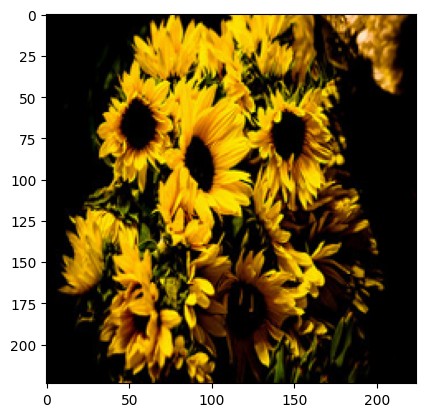

In [6]:
plt.imshow(x[0])
plt.show()

In [7]:
x = np.array(x)
y = np.array(y)

In [8]:
from tensorflow.keras.applications import VGG16

In [10]:
head = VGG16(include_top=False, input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 103s 2us/step


In [12]:
print(np.unique(y))

['daisy' 'dandelion' 'rose' 'sunflower' 'tulip']


In [13]:
labels = {'daisy': 0, 'dandelion':1, 'rose':2, 'sunflower':3, 'tulip':4}

In [14]:
for i in range(len(y)):
    item = y[i]
    y[i] = labels[item]

In [15]:
print(np.unique(y))

['0' '1' '2' '3' '4']


In [18]:
y = y.astype(np.int32)

In [19]:
print(np.unique(y))

[0 1 2 3 4]


In [20]:
for layer in head.layers:
    layer.trainable = False

In [21]:
head.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [22]:
top = Flatten()(head.output)

In [23]:
top = Dense(5, activation='sigmoid')(top)

In [24]:
model = Model(inputs=head.input, outputs=top)

In [25]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [26]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x, y, epochs=5)

Epoch 1/5


2022-11-17 16:32:48.540651: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 649829376 exceeds 10% of free system memory.


135/135 [==============================] - 875s 6s/step - loss: 7.8729 - accuracy: 0.7350
Epoch 2/5
135/135 [==============================] - 2585s 19s/step - loss: 1.5378 - accuracy: 0.9254
Epoch 3/5
121/135 [=========================>....] - ETA: 1:28 - loss: 0.7610 - accuracy: 0.9595